# Time Shifting

Sometimes you may need to shift all your data up or down along the time series index, in fact, a lot of pandas built-in methods do this under the hood. This isn't something we won't do often in the course, but its definitely good to know about this anyways!

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

## Data Preparation (Compare to the ways we did in CH5E)
> 1. Load in the data.  
> 2. Set the *Date* variable as the index.   
> 3. Convert the index to **datetime**.  

In [2]:
df = pd.read_csv('walmart_stock.csv',index_col='Date')
df.index = pd.to_datetime(df.index)

In [3]:
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


In [4]:
df.tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-12-23,69.430000,69.750000,69.360001,69.540001,4803900,69.032411
2016-12-27,69.300003,69.820000,69.250000,69.699997,4435700,69.191240
2016-12-28,69.940002,70.000000,69.260002,69.309998,4875700,68.804087
2016-12-29,69.209999,69.519997,69.120003,69.260002,4298400,68.754456
2016-12-30,69.120003,69.430000,68.830002,69.120003,6889500,68.615479


## Shifting Forward /Backward
> **shift(n)** shifts the data n periods forward.  
> **shift(-n)** shifts the data n periods backward.  
> Note: Some of the observations are lost.  

In [5]:
df.shift(1).head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,59.970001,61.060001,59.869999,60.330002,12668800.0,52.619235
2012-01-05,60.209999,60.349998,59.470001,59.709999,9593300.0,52.078475
2012-01-06,59.349998,59.619999,58.369999,59.419998,12768200.0,51.825539
2012-01-09,59.419998,59.450001,58.869999,59.000000,8069400.0,51.459220


In [6]:
df.shift(1).tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-12-23,71.239998,71.239998,69.209999,69.589996,12106800.0,69.082042
2016-12-27,69.430000,69.750000,69.360001,69.540001,4803900.0,69.032411
2016-12-28,69.300003,69.820000,69.250000,69.699997,4435700.0,69.191240
2016-12-29,69.940002,70.000000,69.260002,69.309998,4875700.0,68.804087
2016-12-30,69.209999,69.519997,69.120003,69.260002,4298400.0,68.754456


In [7]:
df.shift(-1).head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,60.209999,60.349998,59.470001,59.709999,9593300.0,52.078475
2012-01-04,59.349998,59.619999,58.369999,59.419998,12768200.0,51.825539
2012-01-05,59.419998,59.450001,58.869999,59.000000,8069400.0,51.459220
2012-01-06,59.029999,59.549999,58.919998,59.180000,6679300.0,51.616215
2012-01-09,59.430000,59.709999,58.980000,59.040001,6907300.0,51.494109


In [8]:
df.shift(-1).tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-12-23,69.300003,69.820000,69.250000,69.699997,4435700.0,69.191240
2016-12-27,69.940002,70.000000,69.260002,69.309998,4875700.0,68.804087
2016-12-28,69.209999,69.519997,69.120003,69.260002,4298400.0,68.754456
2016-12-29,69.120003,69.430000,68.830002,69.120003,6889500.0,68.615479
2016-12-30,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.tshift(periods=1,freq='M')

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-31,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-31,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-31,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-31,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-31,59.029999,59.549999,58.919998,59.180000,6679300,51.616215
...,...,...,...,...,...,...
2016-12-31,69.430000,69.750000,69.360001,69.540001,4803900,69.032411
2016-12-31,69.300003,69.820000,69.250000,69.699997,4435700,69.191240
2016-12-31,69.940002,70.000000,69.260002,69.309998,4875700,68.804087


## Modify the date based on Frequency
> **tshift(periods=n,frequency=f)** shifts all the dates according to the rule of **frequency=f**.  

## Activity 1
> Shift all the dates to quarter-end.  
> Plot the quarterly mean of *Close*.  

In [10]:
df.tshift(periods=1,freq='Q').head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-03-31,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-03-31,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-03-31,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-03-31,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-03-31,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


<AxesSubplot:xlabel='Date'>

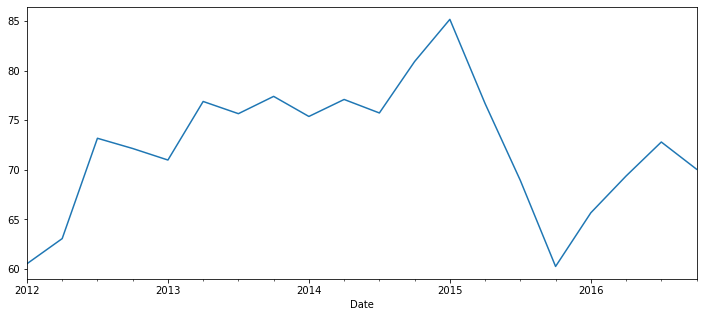

In [11]:
df.tshift(periods=1,freq='Q').resample('Q').mean()['Close'].plot(kind='line',figsize=(12,5))